# Titanic Dataset

### Data source: [Link](https://www.kaggle.com/competitions/titanic)

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "http://www.theatrebloom.com/wp-content/uploads/2018/01/titanic-banner.jpg")

In [211]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Metadata

- Variable	Definition	Key
- survival	Survival	0 = No, 1 = Yes
- pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
- sex Sex	
- Age	Age in years	
- sibsp	# of siblings / spouses aboard the Titanic	
- parch	# of parents / children aboard the Titanic	
- ticket	Ticket number	
- fare	Passenger fare	
- cabin	Cabin number	
- embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [17]:
# Importing Data

filepath="Titanic DB.csv"
df=pd.read_csv(filepath,delimiter=",")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 1. Exploring Data

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##### - The average age of the passengers were about 29.69(30) years
##### - The youngest passenger were a baby not longer than one year
##### - The oldest passenger were and adult of 80 years

### 2. Cleaning up the Data!

In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [18]:
df.rename(columns=str.lower,inplace=True)
df.sample()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
446,447,1,2,"Mellinger, Miss. Madeleine Violet",female,13.0,0,1,250644,19.5,NaN,S


In [19]:
# Filtering columns

filtercolumns=["passengerid","name","age","sex","pclass","fare","cabin","survived"]
df=df.loc[:,filtercolumns]
df

,passengerid,name,age,sex,pclass,fare,cabin,survived
0,1,"Braund, Mr. Owen Harris",22.0,male,3,7.2500,NaN,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,female,1,71.2833,C85,1
2,3,"Heikkinen, Miss. Laina",26.0,female,3,7.9250,NaN,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,female,1,53.1000,C123,1
4,5,"Allen, Mr. William Henry",35.0,male,3,8.0500,NaN,0
...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",27.0,male,2,13.0000,NaN,0
887,888,"Graham, Miss. Margaret Edith",19.0,female,1,30.0000,B42,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,female,3,23.4500,NaN,0
889,890,"Behr, Mr. Karl Howell",26.0,male,1,30.0000,C148,1


In [20]:
df.isnull().sum()

passengerid      0
name             0
age            177
sex              0
pclass           0
fare             0
cabin          687
survived         0
dtype: int64

In [24]:
# Renaiming objects of column survived

df["survived"]=df.survived.replace({0:"not survived",1:"survived"})
df

,passengerid,name,age,sex,pclass,fare,cabin,survived
0,1,"Braund, Mr. Owen Harris",22.0,male,3,7.2500,NaN,not survived
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,female,1,71.2833,C85,survived
2,3,"Heikkinen, Miss. Laina",26.0,female,3,7.9250,NaN,survived
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,female,1,53.1000,C123,survived
4,5,"Allen, Mr. William Henry",35.0,male,3,8.0500,NaN,not survived
...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",27.0,male,2,13.0000,NaN,not survived
887,888,"Graham, Miss. Margaret Edith",19.0,female,1,30.0000,B42,survived
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,female,3,23.4500,NaN,not survived
889,890,"Behr, Mr. Karl Howell",26.0,male,1,30.0000,C148,survived


In [132]:
df["pclass"]=df.pclass.replace({1:"First Class",2:"Second Class",3:"Third Class"})
df

,passengerid,name,age,sex,pclass,fare,cabin,survived
0,1,"Braund, Mr. Owen Harris",22.0,male,Third Class,7.2500,NaN,not survived
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,female,First Class,71.2833,C85,survived
2,3,"Heikkinen, Miss. Laina",26.0,female,Third Class,7.9250,NaN,survived
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,female,First Class,53.1000,C123,survived
4,5,"Allen, Mr. William Henry",35.0,male,Third Class,8.0500,NaN,not survived
...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",27.0,male,Second Class,13.0000,NaN,not survived
887,888,"Graham, Miss. Margaret Edith",19.0,female,First Class,30.0000,B42,survived
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,female,Third Class,23.4500,NaN,not survived
889,890,"Behr, Mr. Karl Howell",26.0,male,First Class,30.0000,C148,survived


### 3. Analyse Data

In [133]:
titanic=df.copy()

#### 3.1 What is the survival and death rate?

In [134]:
survived=titanic.groupby(["name"],as_index=False).survived.sum()
survived

,name,survived
0,"Abbing, Mr. Anthony",not survived
1,"Abbott, Mr. Rossmore Edward",not survived
2,"Abbott, Mrs. Stanton (Rosa Hunt)",survived
3,"Abelson, Mr. Samuel",not survived
4,"Abelson, Mrs. Samuel (Hannah Wizosky)",survived
...,...,...
886,"de Mulder, Mr. Theodore",survived
887,"de Pelsmaeker, Mr. Alfons",not survived
888,"del Carlo, Mr. Sebastiano",not survived
889,"van Billiard, Mr. Austin Blyler",not survived


In [135]:
surviveddf=survived.groupby(["survived"],as_index=False).count()
surviveddf

,survived,name
0,not survived,549
1,survived,342


In [136]:
total_passengers=titanic.shape[0]

In [178]:
#Death and survival rates

survived_=341
not_survived=549

survived_rate=round(survived_/total_passengers*100,2)
not_survived_rate=round(not_survived/total_passengers*100,2)

print(f"The rates are: {survived_rate}% for survived and {not_survived_rate}% for not survived")

The rates are: 38.27% for survived and 61.62% for not survived


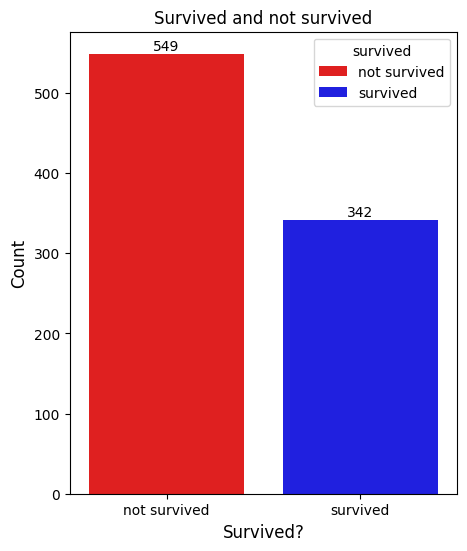

In [179]:
plt.figure(figsize=(5,6))
ax=sns.barplot(x="survived",y="name",data=surviveddf,hue="survived",legend=True,palette=["r","b"])
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Survived and not survived")
plt.xlabel("Survived?",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.show()

### 3.2 What is the survival rate by gender?

In [180]:
titanic.head()

,passengerid,name,age,sex,pclass,fare,cabin,survived
0,1,"Braund, Mr. Owen Harris",22.0,male,Third Class,7.2500,NaN,not survived
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,female,First Class,71.2833,C85,survived
2,3,"Heikkinen, Miss. Laina",26.0,female,Third Class,7.9250,NaN,survived
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,female,First Class,53.1000,C123,survived
4,5,"Allen, Mr. William Henry",35.0,male,Third Class,8.0500,NaN,not survived


In [181]:
gender_rate=pd.DataFrame(titanic.groupby(["sex","survived"]).survived.count())
gender_rate

survived
sex    survived              
female not survived        81
       survived           233
male   not survived       468
       survived           109

In [182]:
gender_rate.rename(columns=({"survived":"total"}),inplace=True)
gender_rate

total
sex    survived           
female not survived     81
       survived        233
male   not survived    468
       survived        109

In [183]:
gender_rate=gender_rate.reset_index()
gender_rate

,sex,survived,total
0,female,not survived,81
1,female,survived,233
2,male,not survived,468
3,male,survived,109


In [184]:
gender_rate=gender_rate.assign(rate=lambda x:(x["total"]/total_passengers*100))
gender_rate["rate"]=gender_rate.rate.round(2)
gender_rate

,sex,survived,total,rate
0,female,not survived,81,9.09
1,female,survived,233,26.15
2,male,not survived,468,52.53
3,male,survived,109,12.23


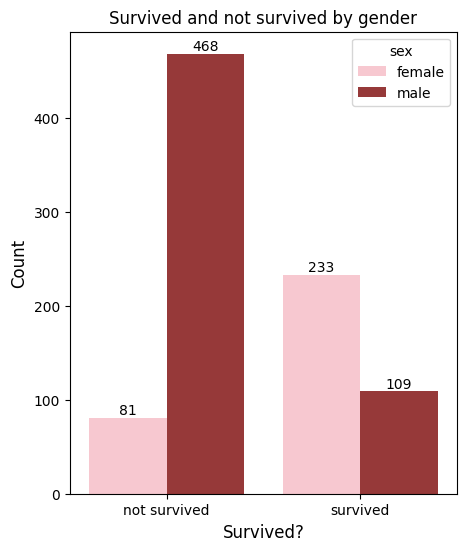

In [240]:
plt.figure(figsize=(5,6))
ax=sns.barplot(x="survived",y="total",data=gender_rate,hue="sex",palette=["pink","brown"],legend=True)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Survived and not survived by gender")
plt.xlabel("Survived?",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.show()

### 3.3 What is the survival rate by class?

In [186]:
titanic.head()

,passengerid,name,age,sex,pclass,fare,cabin,survived
0,1,"Braund, Mr. Owen Harris",22.0,male,Third Class,7.2500,NaN,not survived
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,female,First Class,71.2833,C85,survived
2,3,"Heikkinen, Miss. Laina",26.0,female,Third Class,7.9250,NaN,survived
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,female,First Class,53.1000,C123,survived
4,5,"Allen, Mr. William Henry",35.0,male,Third Class,8.0500,NaN,not survived


In [187]:
class_rate=pd.DataFrame(titanic.groupby(["pclass","survived"]).survived.count())
class_rate

survived
pclass       survived              
First Class  not survived        80
             survived           136
Second Class not survived        97
             survived            87
Third Class  not survived       372
             survived           119

In [188]:
class_rate.rename(columns=({"survived":"total"}),inplace=True)
class_rate=class_rate.reset_index()
class_rate

,pclass,survived,total
0,First Class,not survived,80
1,First Class,survived,136
2,Second Class,not survived,97
3,Second Class,survived,87
4,Third Class,not survived,372
5,Third Class,survived,119


In [189]:
class_rate=class_rate.assign(rate=lambda x:(x["total"]/total_passengers*100))
class_rate["rate"]=class_rate.rate.round(2)
class_rate

,pclass,survived,total,rate
0,First Class,not survived,80,8.98
1,First Class,survived,136,15.26
2,Second Class,not survived,97,10.89
3,Second Class,survived,87,9.76
4,Third Class,not survived,372,41.75
5,Third Class,survived,119,13.36


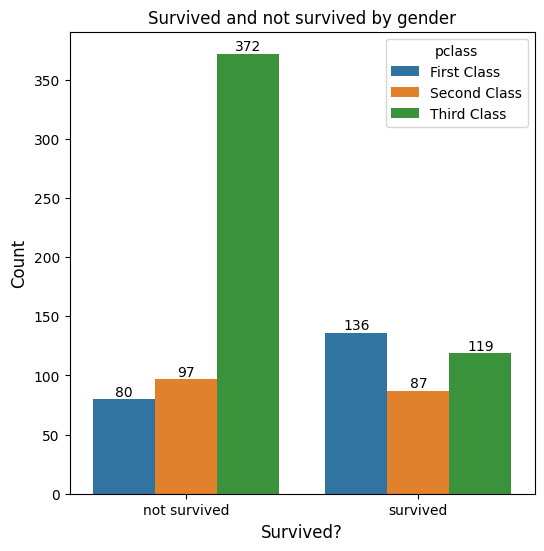

In [217]:
plt.figure(figsize=(6,6))
ax=sns.barplot(x="survived",y="total",data=class_rate,hue="pclass",palette=("tab10"),legend=True)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Survived and not survived by gender")
plt.xlabel("Survived?",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.show()

### 3.4 What was the average Titanic ticket price?

In [229]:
print(f"The average ticket fare price in the Titanic was $:{titanic.fare.mean().round(2)}")

The average ticket fare price in the Titanic was $:32.2


### 3.5 What was the name of the oldest passenger, did he or she survived?

In [237]:
# Oldest age on board

titanic.age.max()

80.0

In [238]:
filter=titanic.age==80
titanic.loc[filter]

,passengerid,name,age,sex,pclass,fare,cabin,survived
630,631,"Barkworth, Mr. Algernon Henry Wilson",80.0,male,First Class,30.0,A23,survived


#### The oldest passenger on board was a 80 years old male by the name of Alergnon Henry Wilson.

### 3.6 List the name of the babies on board, did all of them survived?

In [239]:
filter=titanic.age<1
titanic.loc[filter]

,passengerid,name,age,sex,pclass,fare,cabin,survived
78,79,"Caldwell, Master. Alden Gates",0.83,male,Second Class,29.0000,NaN,survived
305,306,"Allison, Master. Hudson Trevor",0.92,male,First Class,151.5500,C22 C26,survived
469,470,"Baclini, Miss. Helene Barbara",0.75,female,Third Class,19.2583,NaN,survived
644,645,"Baclini, Miss. Eugenie",0.75,female,Third Class,19.2583,NaN,survived
755,756,"Hamalainen, Master. Viljo",0.67,male,Second Class,14.5000,NaN,survived
803,804,"Thomas, Master. Assad Alexander",0.42,male,Third Class,8.5167,NaN,survived
831,832,"Richards, Master. George Sibley",0.83,male,Second Class,18.7500,NaN,survived


#### Yes, the babies on board survived